# Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport

# Exploratory Data Analysis
## Load One Dataset for Inspection

In [2]:
df = pd.read_csv('../DiskDriveDataSets/data_Q1_2019/2019-01-31.csv')
df.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,1/31/2019,ZJV1CSTH,ST12000NM0007,1.200010e+13,1,71,14088704,NaN,NaN,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/31/2019,Z302SR45,ST4000DM000,4.000790e+12,1,113,55200712,NaN,NaN,95.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/31/2019,PL1311LAG38K1H,HGST HDS5C4040ALE630,4.000790e+12,0,100,0,131.0,112.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/31/2019,PL1331LAGXN3AH,HGST HDS5C4040ALE630,4.000790e+12,0,100,0,133.0,105.0,145.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/31/2019,PL1321LAG6NKRH,HGST HDS5C4040ALE630,4.000790e+12,0,100,0,135.0,96.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Create List of Files from Directory

In [3]:
data_dir = os.listdir('../DiskDriveDataSets')
Q1_dir = os.listdir('../DiskDriveDataSets/data_Q1_2019')
len(Q1_dir)

90

## Create a Dataframe of Drive Failure Statistics

### Create an empty dataframe

In [4]:
drive_fail_data = pd.DataFrame(columns=['model', 'count', 'failure'])
drive_fail_data

,model,count,failure


### Loop through the files is the Q1 directory
__Create a dataframe of model #, count, number of failures, and failure rate.___

In [6]:
# Loop Through Files in Directory
for file in Q1_dir:  
    # Get file name and create df
    df = pd.read_csv('../DiskDriveDataSets/data_Q1_2019/' + file)

    # Create models df of model # and count
    models = df.model.value_counts()
    models = models.reset_index()
    models = models.rename(columns={'index':'model', 'model':'count'})

    # Create fails df of model # and failure count
    fails = df.groupby('model').agg({'failure':'sum'}).reset_index()

    # Merge fails with models
    models = pd.merge(models, fails, how='inner', on='model')
    
    drive_fail_data = pd.concat([drive_fail_data, models])
    drive_fail_data = drive_fail_data.groupby('model').agg({'count':'sum', 'failure':'sum'}).reset_index()

In [7]:
drive_fail_data['failure rate'] = drive_fail_data['failure'] / drive_fail_data['count']
drive_fail_data.sort_values(by='failure', ascending=False).head(10)

,model,count,failure,failure rate
14,ST12000NM0007,2955025,180,0.000061
19,ST4000DM000,1989429,107,0.000054
30,ST8000NM0055,1294451,58,0.000045
27,ST8000DM002,888741,29,0.000033
38,TOSHIBA MQ01ABF050,46969,14,0.000298
21,ST500LM012 HN,50619,12,0.000237
3,HGST HMS5C4040BLE640,1172824,11,0.000009
23,ST500LM030,14479,9,0.000622
7,HGST HUH721212ALN604,259749,4,0.000015
8,HGST HUH728080ALE600,93598,3,0.000032


In [8]:
drive_fail_data.sort_values(by='failure rate', ascending=False).head(10)

,model,count,failure,failure rate
28,ST8000DM004,273,1,0.003663
23,ST500LM030,14479,9,0.000622
46,WDC WD5000LPCX,4920,2,0.000407
38,TOSHIBA MQ01ABF050,46969,14,0.000298
21,ST500LM012 HN,50619,12,0.000237
39,TOSHIBA MQ01ABF050M,32624,3,0.000092
47,WDC WD5000LPVX,22015,2,0.000091
6,HGST HUH721212ALE600,14040,1,0.000071
14,ST12000NM0007,2955025,180,0.000061
19,ST4000DM000,1989429,107,0.000054


# Find the First Drive Failure of Model ST12000NM0007

In [10]:
df = pd.read_csv('../DiskDriveDataSets/data_Q1_2019/2019-01-31.csv')
df.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,1/31/2019,ZJV1CSTH,ST12000NM0007,1.200010e+13,1,71,14088704,NaN,NaN,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/31/2019,Z302SR45,ST4000DM000,4.000790e+12,1,113,55200712,NaN,NaN,95.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/31/2019,PL1311LAG38K1H,HGST HDS5C4040ALE630,4.000790e+12,0,100,0,131.0,112.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/31/2019,PL1331LAGXN3AH,HGST HDS5C4040ALE630,4.000790e+12,0,100,0,133.0,105.0,145.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/31/2019,PL1321LAG6NKRH,HGST HDS5C4040ALE630,4.000790e+12,0,100,0,135.0,96.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
idx = np.where((df['model'] == 'ST12000NM0007') & (df['failure'] == 1))
idx

(array([0], dtype=int64),)

In [12]:
serial = df.loc[idx]['serial_number']
serial

0    ZJV1CSTH
Name: serial_number, dtype: object

In [13]:
serial = str(serial[0])
serial

'ZJV1CSTH'

## Create Empty Dataframe with DF Columns

In [14]:
cols = df.columns

globals()[serial] = pd.DataFrame(columns=[cols])

In [15]:
serial

'ZJV1CSTH'

In [16]:
for i in range(31, 0, -1):
    df = pd.read_csv('../DiskDriveDataSets/data_Q1_2019/2019-01-' + str(i).zfill(2) + '.csv')
    drive = df.loc[df['serial_number'] == serial]
    try:
        ZJV1CSTH = pd.merge(ZJV1CSTH, drive, how='outer')
    except:
        ZJV1CSTH = drive

In [17]:
globals()[serial].shape


(31, 129)

In [18]:
ZJV1CSTH.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,1/31/2019,ZJV1CSTH,ST12000NM0007,1.200010e+13,1,71.0,14088704.0,NaN,NaN,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-30,ZJV1CSTH,ST12000NM0007,1.200014e+13,0,72.0,16613104.0,NaN,NaN,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-29,ZJV1CSTH,ST12000NM0007,1.200014e+13,0,81.0,121030960.0,NaN,NaN,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/28/2019,ZJV1CSTH,ST12000NM0007,1.200010e+13,0,75.0,28315360.0,NaN,NaN,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-27,ZJV1CSTH,ST12000NM0007,1.200014e+13,0,76.0,40307128.0,NaN,NaN,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
ZJV1CSTH = ZJV1CSTH.dropna(axis=1, how='all')

In [20]:
ZJV1CSTH.shape

(31, 49)

In [21]:
ZJV1CSTH.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,...,smart_199_normalized,smart_199_raw,smart_200_normalized,smart_200_raw,smart_240_normalized,smart_240_raw,smart_241_normalized,smart_241_raw,smart_242_normalized,smart_242_raw
0,1/31/2019,ZJV1CSTH,ST12000NM0007,1.200010e+13,1,71.0,14088704.0,99.0,0.0,100.0,...,200.0,0.0,100.0,0.0,100.0,1313.0,100.0,1.436721e+10,100.0,9.328606e+09
1,2019-01-30,ZJV1CSTH,ST12000NM0007,1.200014e+13,0,72.0,16613104.0,99.0,0.0,100.0,...,200.0,0.0,100.0,0.0,100.0,1281.0,100.0,1.394089e+10,100.0,9.025027e+09
2,2019-01-29,ZJV1CSTH,ST12000NM0007,1.200014e+13,0,81.0,121030960.0,99.0,0.0,100.0,...,200.0,0.0,100.0,0.0,100.0,1265.0,100.0,1.372743e+10,100.0,8.854623e+09
3,1/28/2019,ZJV1CSTH,ST12000NM0007,1.200010e+13,0,75.0,28315360.0,99.0,0.0,100.0,...,200.0,0.0,100.0,0.0,100.0,1234.0,100.0,1.343507e+10,100.0,8.565993e+09
4,2019-01-27,ZJV1CSTH,ST12000NM0007,1.200014e+13,0,76.0,40307128.0,99.0,0.0,100.0,...,200.0,0.0,100.0,0.0,100.0,1218.0,100.0,1.334874e+10,100.0,8.420172e+09


In [22]:
amounts = ZJV1CSTH.nunique()

In [23]:
amounts

date                    31
serial_number            1
model                    1
capacity_bytes           2
failure                  2
smart_1_normalized      14
smart_1_raw             31
smart_3_normalized       1
smart_3_raw              1
smart_4_normalized       1
smart_4_raw              1
smart_5_normalized       1
smart_5_raw              1
smart_7_normalized       6
smart_7_raw             31
smart_9_normalized       2
smart_9_raw             31
smart_10_normalized      1
smart_10_raw             1
smart_12_normalized      1
smart_12_raw             1
smart_187_normalized     1
smart_187_raw            1
smart_188_normalized     1
smart_188_raw            1
smart_190_normalized     3
smart_190_raw            3
smart_192_normalized     1
smart_192_raw            3
smart_193_normalized     1
smart_193_raw           27
smart_194_normalized     3
smart_194_raw            3
smart_195_normalized    14
smart_195_raw           31
smart_197_normalized     1
smart_197_raw            3
s

In [24]:
data_cols = ZJV1CSTH.columns
data_cols = data_cols[5:]
data_cols

Index(['smart_1_normalized', 'smart_1_raw', 'smart_3_normalized',
       'smart_3_raw', 'smart_4_normalized', 'smart_4_raw',
       'smart_5_normalized', 'smart_5_raw', 'smart_7_normalized',
       'smart_7_raw', 'smart_9_normalized', 'smart_9_raw',
       'smart_10_normalized', 'smart_10_raw', 'smart_12_normalized',
       'smart_12_raw', 'smart_187_normalized', 'smart_187_raw',
       'smart_188_normalized', 'smart_188_raw', 'smart_190_normalized',
       'smart_190_raw', 'smart_192_normalized', 'smart_192_raw',
       'smart_193_normalized', 'smart_193_raw', 'smart_194_normalized',
       'smart_194_raw', 'smart_195_normalized', 'smart_195_raw',
       'smart_197_normalized', 'smart_197_raw', 'smart_198_normalized',
       'smart_198_raw', 'smart_199_normalized', 'smart_199_raw',
       'smart_200_normalized', 'smart_200_raw', 'smart_240_normalized',
       'smart_240_raw', 'smart_241_normalized', 'smart_241_raw',
       'smart_242_normalized', 'smart_242_raw'],
      dtype='object'

In [25]:
drop = []

for col in data_cols:
    if ZJV1CSTH[col].nunique() <= 1:
        drop.append(col)
        
ZJV1CSTH = ZJV1CSTH.drop(drop, axis=1)

In [26]:
data_cols = ZJV1CSTH.columns[5:]

In [32]:
ZJV1CSTH = ZJV1CSTH.sort_values(by=['date'])

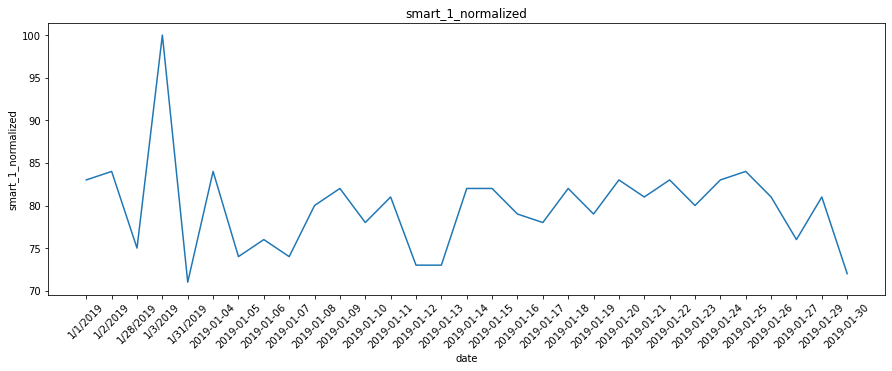

smart_1_normalized 14


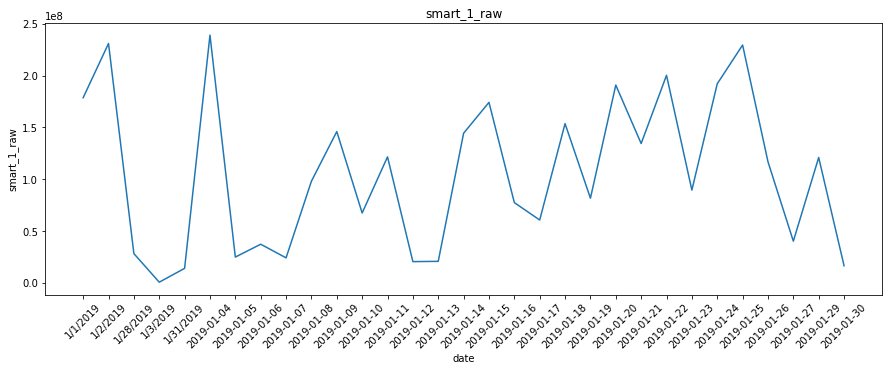

smart_1_raw 31


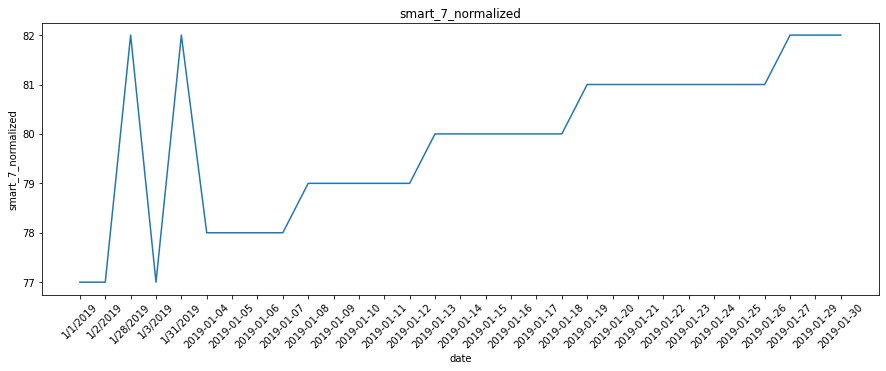

smart_7_normalized 6


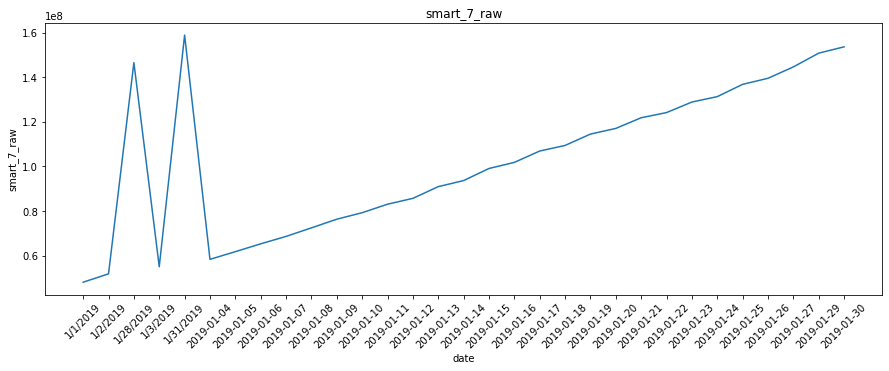

smart_7_raw 31


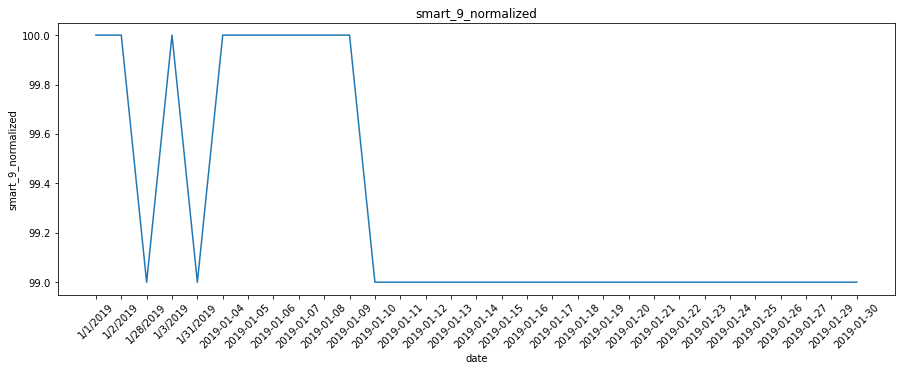

smart_9_normalized 2


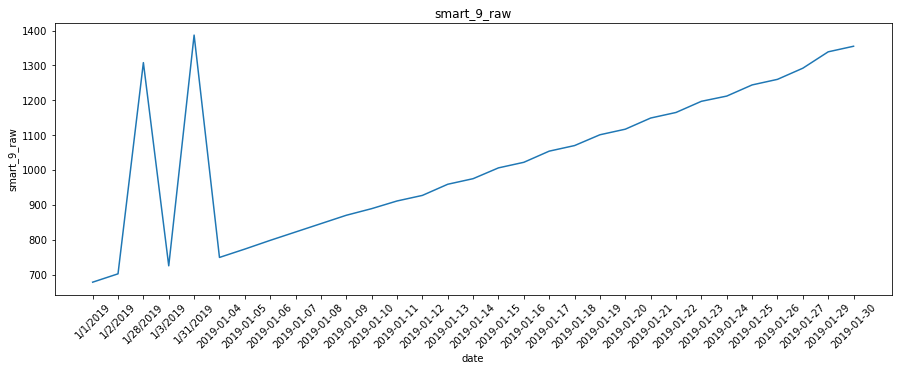

smart_9_raw 31


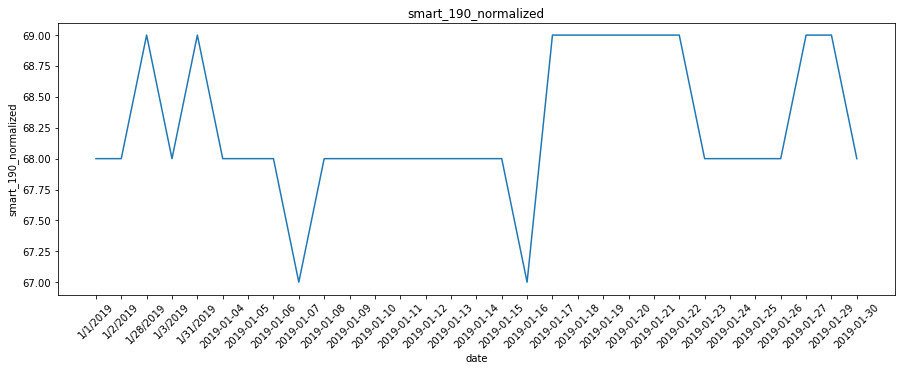

smart_190_normalized 3


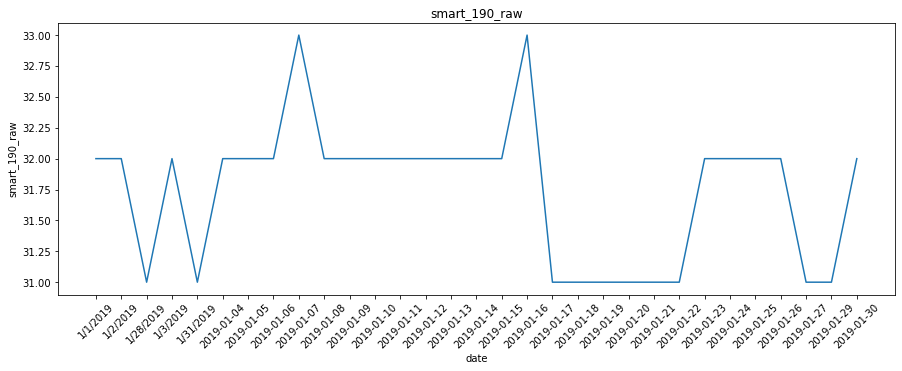

smart_190_raw 3


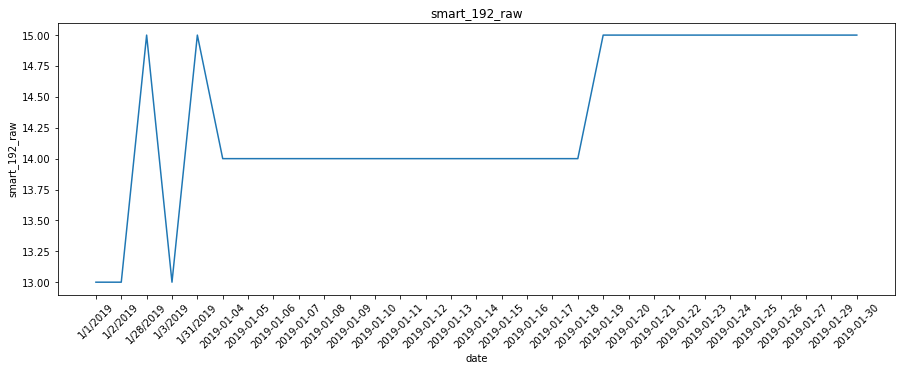

smart_192_raw 3


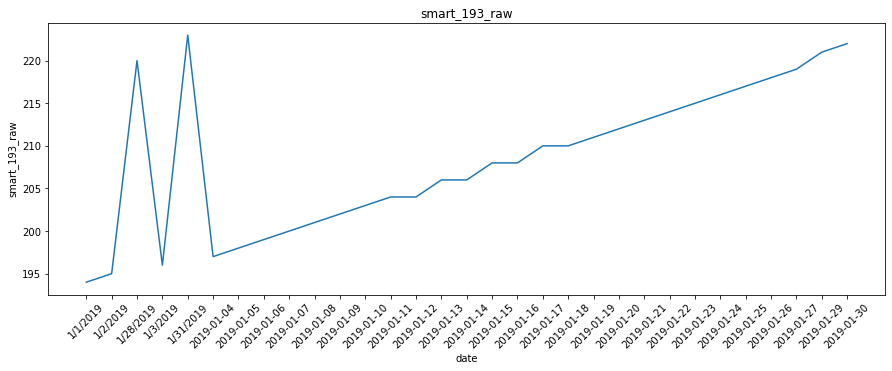

smart_193_raw 27


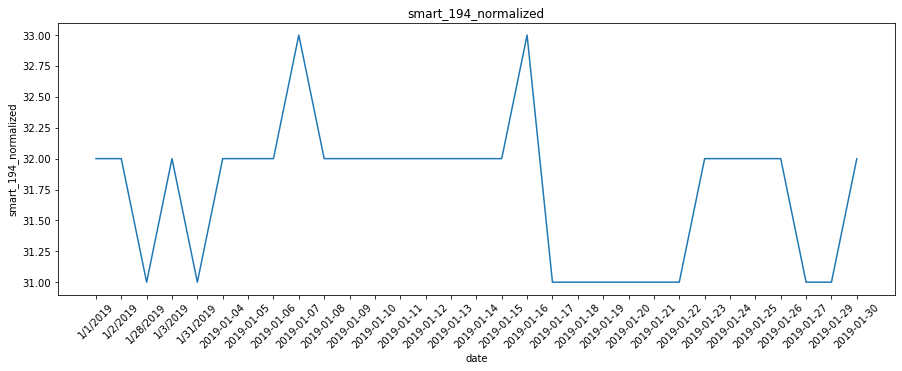

smart_194_normalized 3


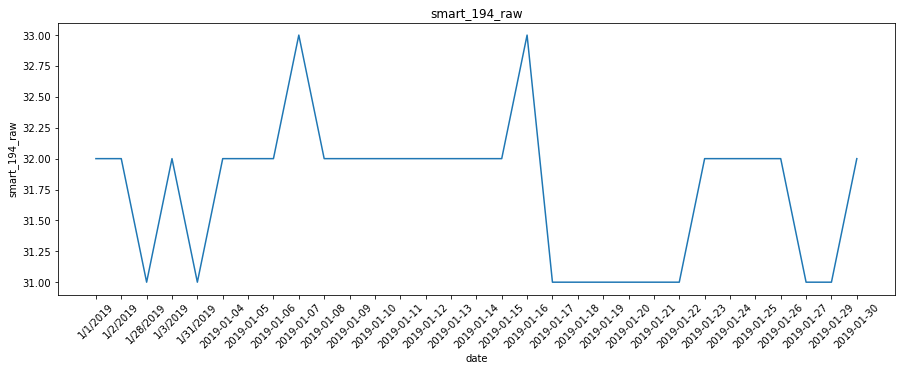

smart_194_raw 3


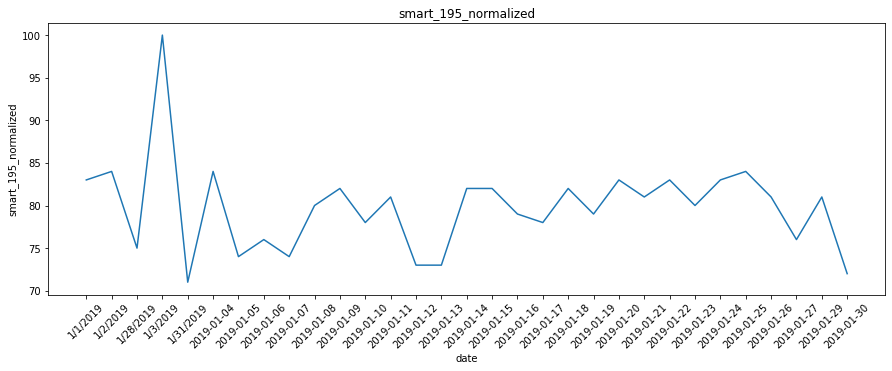

smart_195_normalized 14


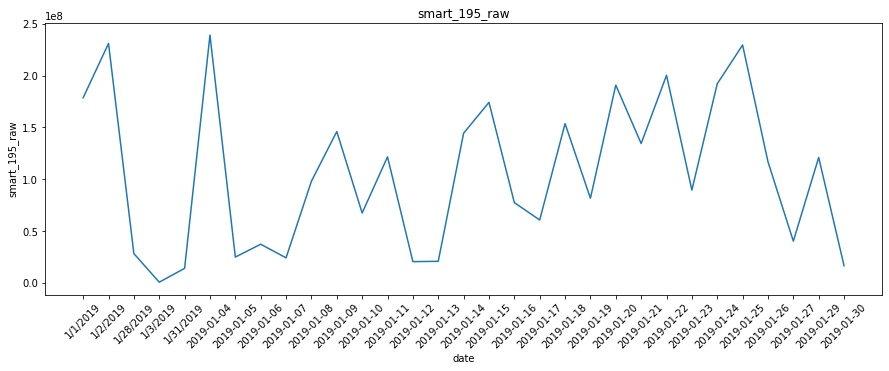

smart_195_raw 31


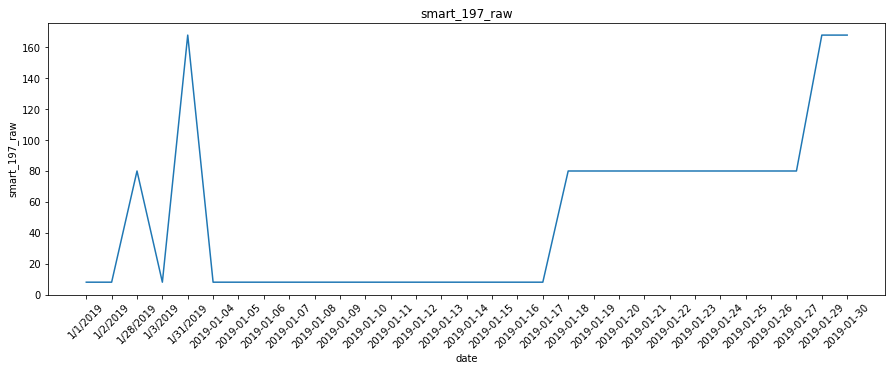

smart_197_raw 3


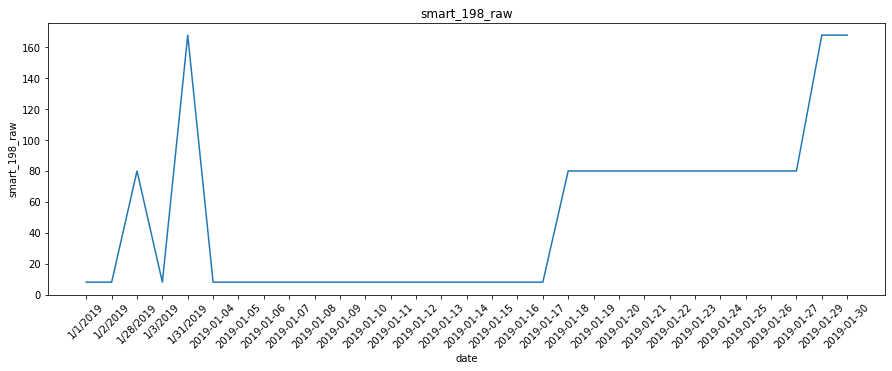

smart_198_raw 3


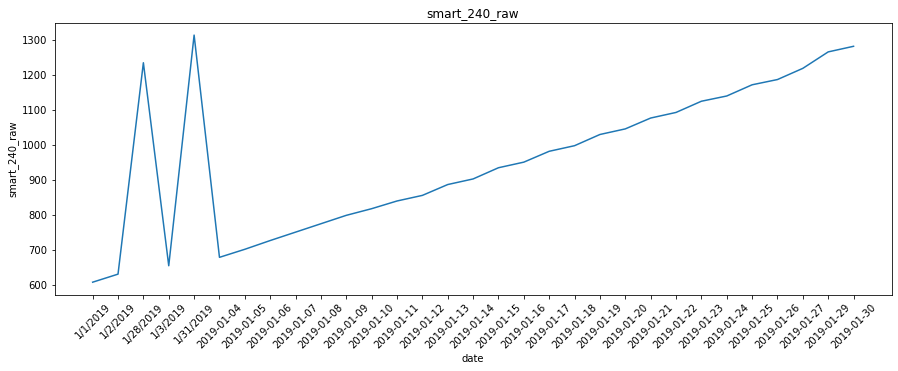

smart_240_raw 31


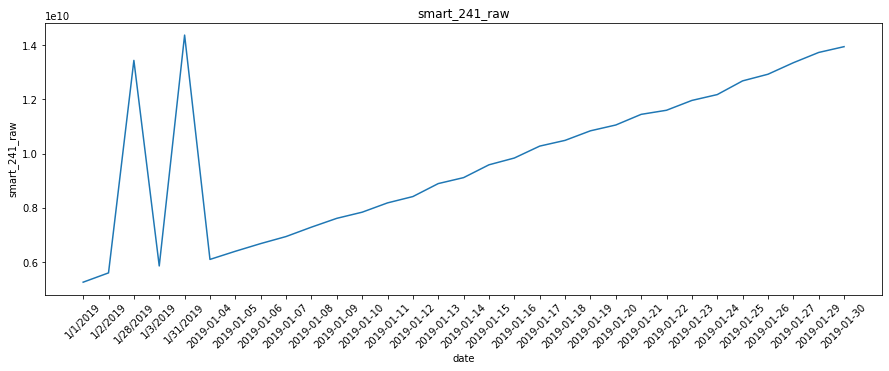

smart_241_raw 31


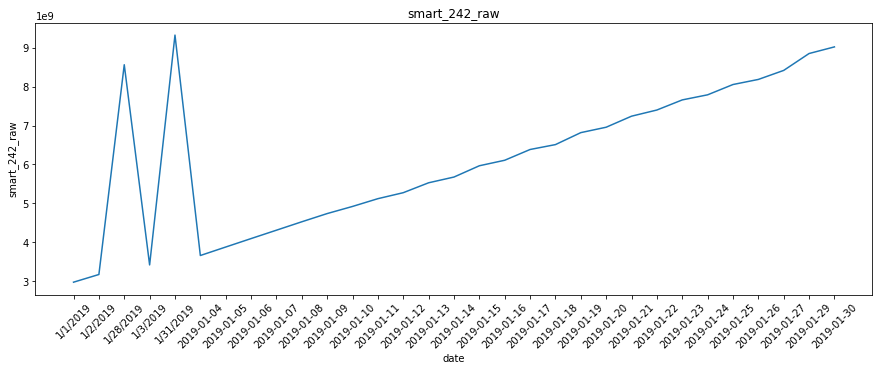

smart_242_raw 31


In [33]:
for col in data_cols:
    plt.figure(figsize=(15,5))
    plt.title(col)
    plt.xticks(rotation=45)
    sns.lineplot(x='date', y=col, data=ZJV1CSTH)
    plt.show()
    print(col, ZJV1CSTH[col].nunique())